# Tomato leaf disease detection


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split


# Tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard  
from tensorflow.keras.utils import normalize
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.metrics import Precision
# metrics
from sklearn.metrics import classification_report, confusion_matrix

2024-05-11 11:34:10.807314: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 11:34:10.933348: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 11:34:11.433062: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 11:34:14.093894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
train_path = r'../data/input/train'

Categories = [Class for Class in os.listdir(train_path)]

train_data = []

for category in Categories:
    label = Categories.index(category)
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        image = os.path.join(path, img)
        try:
            the_img = cv2.imread(image)
            the_img = cv2.resize(the_img, (150, 150))
            train_data.append([the_img, label])
        except Exception as ex:
            pass

In [5]:
test_path = r"../data/input/val"

Categories = [Class for Class in os.listdir(test_path)]

test_data = []

for category in Categories:
    label = Categories.index(category)
    path = os.path.join(test_path, category)
    for img in os.listdir(path):
        image = os.path.join(path, img)
        try:
            the_img = cv2.imread(image)
            the_img = cv2.resize(the_img, (150, 150))
            test_data.append([the_img, label])
        except Exception as ex:
            pass

In [6]:
# On The Train Data
X = []
y = []

for features, labels in train_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X) # Features
y = np.array(y) # Targets

In [7]:
# Split To Train and Validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.13, random_state=42, shuffle=True)

In [8]:
# On The Test Data
X_test = []
y_test = []

for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)
    
X_test = np.array(X_test) # Features
y_test = np.array(y_test) # Targets

In [9]:
# shapes
print(f"X_train shape is {X_train.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"X_valid shape is {X_valid.shape}")
print(f"y_valid shape is {y_valid.shape}")
print(f"X_test shape is {X_test.shape}")
print(f"y_test shape is {y_test.shape}")

X_train shape is (8700, 150, 150, 3)
y_train shape is (8700,)
X_valid shape is (1300, 150, 150, 3)
y_valid shape is (1300,)
X_test shape is (1000, 150, 150, 3)
y_test shape is (1000,)


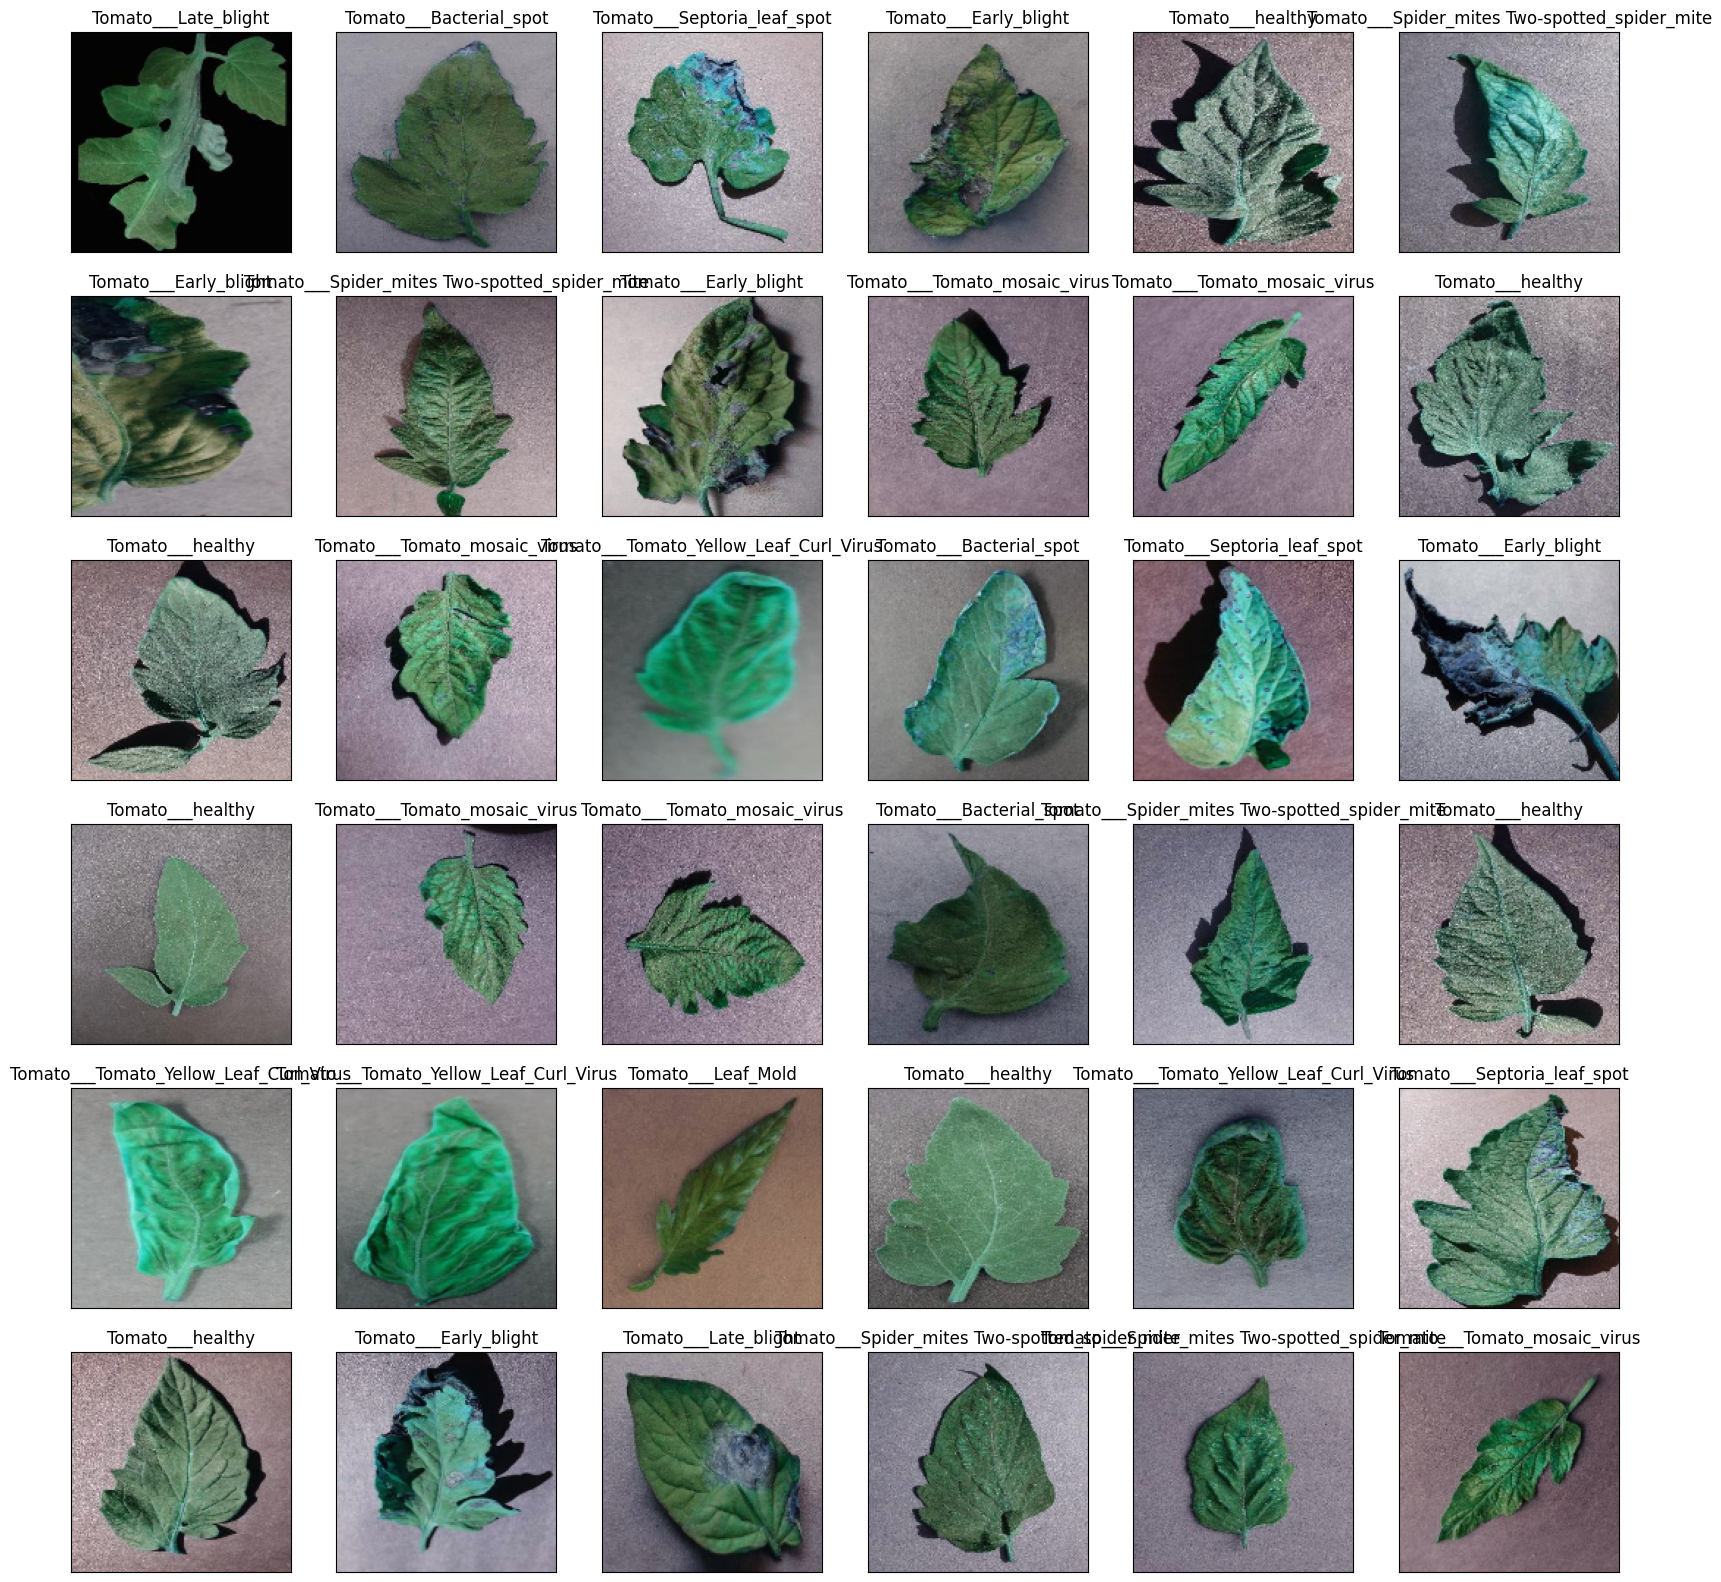

In [10]:
plt.figure(figsize=(20, 20))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.imshow(X_train[i])
    plt.title(f"{Categories[y_train[i]]}")
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [11]:
y_train

array([4, 5, 9, ..., 5, 0, 7])

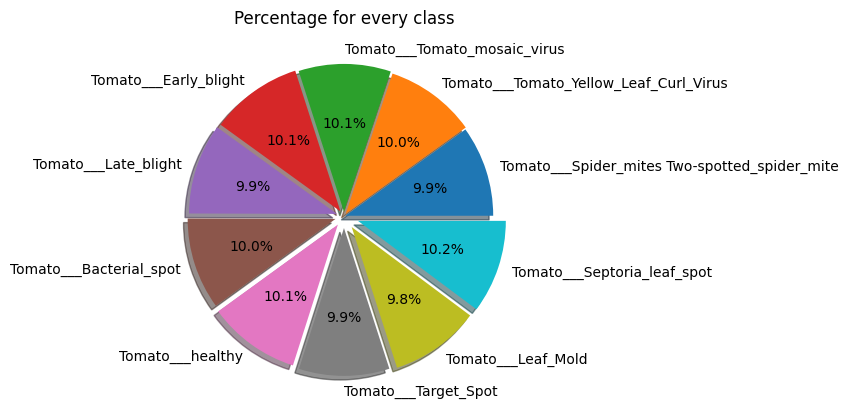

In [12]:
plt.pie([len(y_train[y_train==0]), len(y_train[y_train==1]), len(y_train[y_train==2]), len(y_train[y_train==3]),
        len(y_train[y_train==4]), len(y_train[y_train==5]), len(y_train[y_train==6]), len(y_train[y_train==7]), 
         len(y_train[y_train==8]), len(y_train[y_train==9])], 
       labels=Categories, autopct="%1.1f%%", shadow=True, explode=[i for i in np.arange(0.01, 0.11, 0.01)])

plt.title("Percentage for every class")
plt.show()

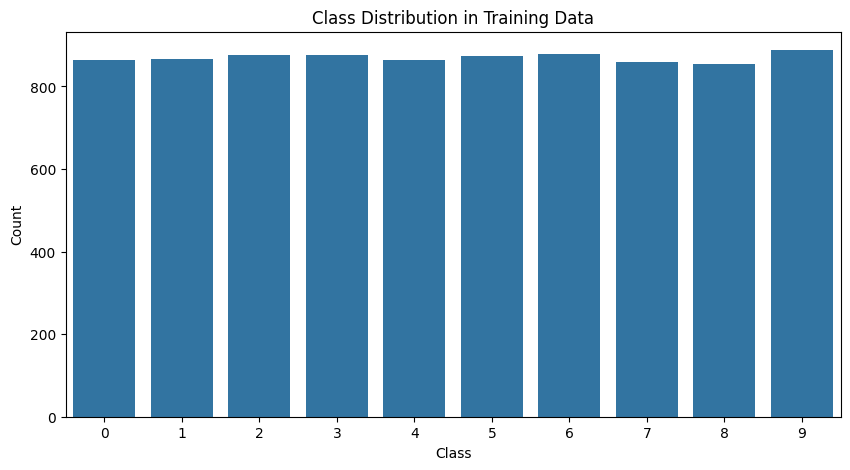

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

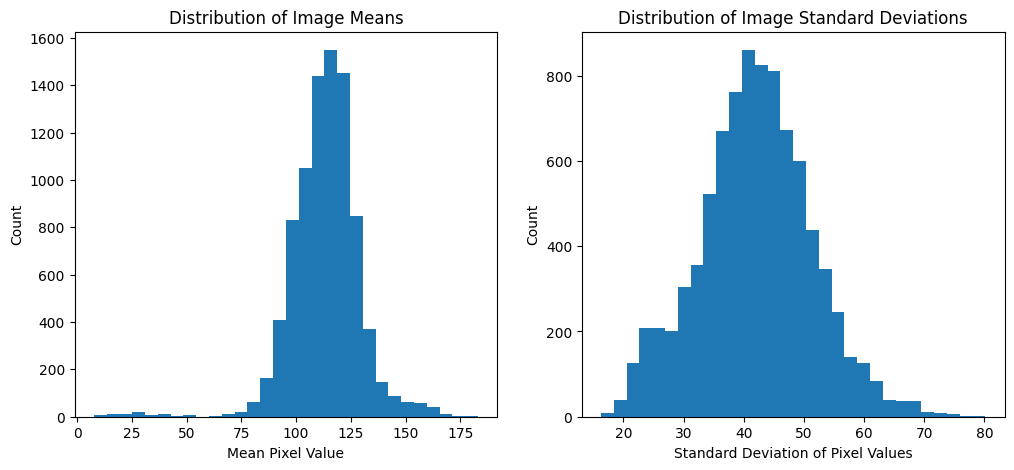

In [14]:
image_means = [np.mean(image) for image in X_train]
image_stds = [np.std(image) for image in X_train]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(image_means, bins=30)
plt.title('Distribution of Image Means')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(image_stds, bins=30)
plt.title('Distribution of Image Standard Deviations')
plt.xlabel('Standard Deviation of Pixel Values')
plt.ylabel('Count')

plt.show()

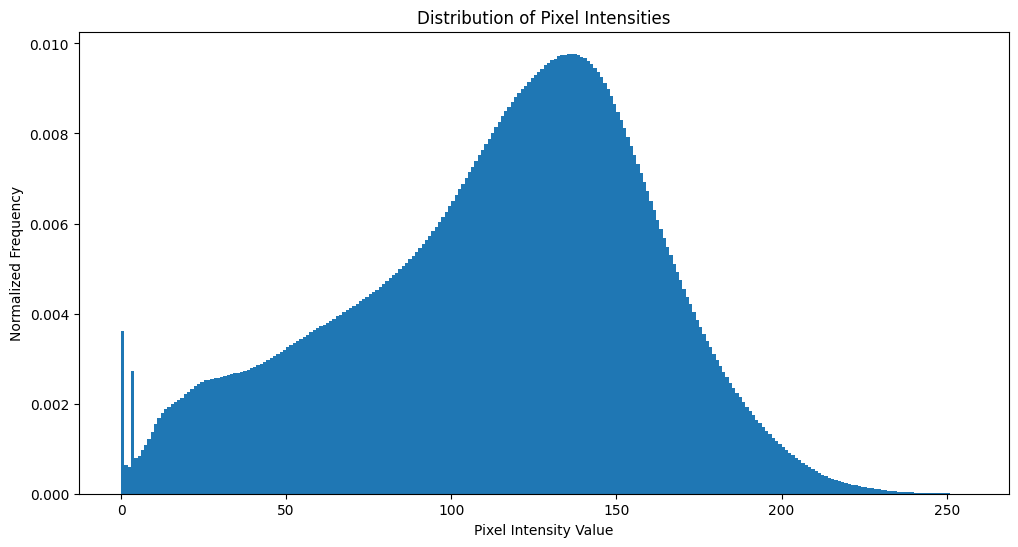

In [15]:
flattened_images = np.concatenate([image.flatten() for image in X_train])

# Plot the distribution of pixel intensities
plt.figure(figsize=(12, 6))
plt.hist(flattened_images, bins=256, range=[0, 256], density=True)
plt.title('Distribution of Pixel Intensities')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Normalized Frequency')
plt.show()

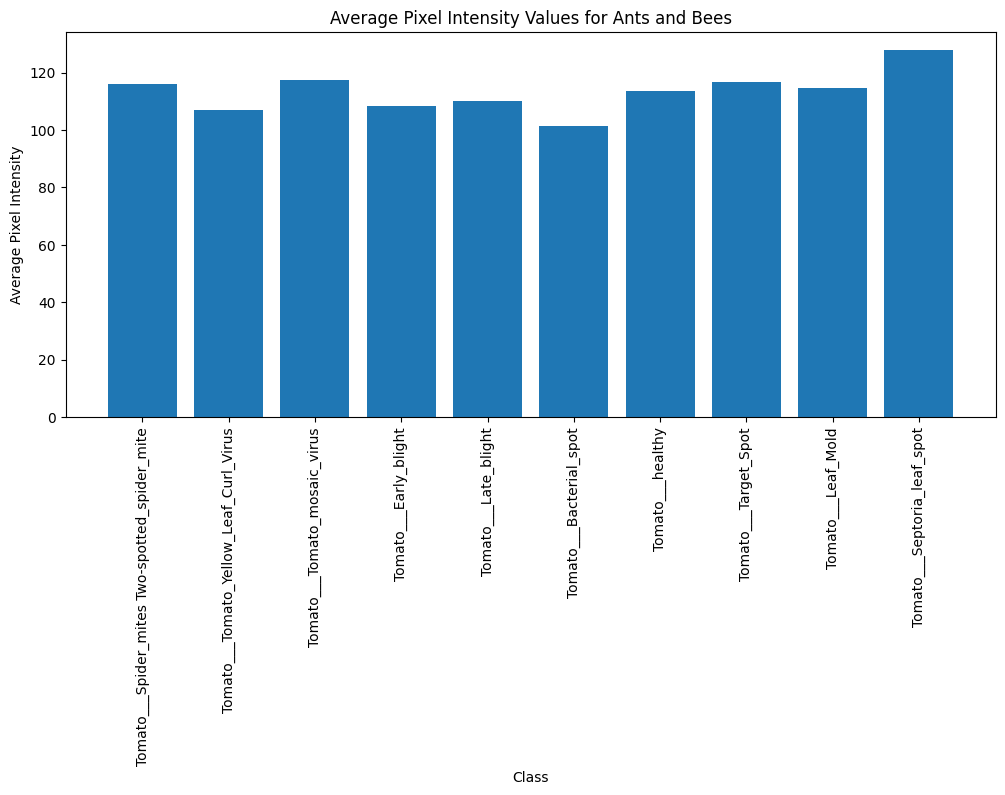

In [16]:
# ClassOne_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 0])
# ClassTow_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 1])
# Class3_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 2])
# Class4_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 3])
# Class5_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 4])
# Class6_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 5])
# Class7_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 6])
# Class8_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 7])
# Class9_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 8])
# Class10_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 9])

# Plot bar chart comparing average pixel intensity values
labels = Categories
values = []

for i in range (10):
    Class = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == i])
    values.append(Class)
    
plt.figure(figsize=(12, 5))
plt.bar(labels, values) 
plt.title('Average Pixel Intensity Values for Ants and Bees')
plt.xlabel('Class')
plt.ylabel('Average Pixel Intensity')
plt.xticks(rotation=90)
plt.show()

In [17]:
# make the range of piexls between 0 & 1
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

: 

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
model = Sequential([
    data_augmentation,
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=X_train[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax'),
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# Define callbacks 
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint, early_stopping])